# Import Packages

In [9]:
import pandas as pd

pd.set_option('expand_frame_repr', False)
pd.set_option('display.max_rows', 20)
pd.set_option('precision', 2)

import os

import outliner_remover
import imp
imp.reload(outliner_remover)

         when using: `python -m better_exceptions'. Otherwise, only code
         loaded from files will be inspected!


<module 'outliner_remover' from 'E:\\Pycharm\\Workspace\\ta-master\\New_Task\\outliner_remover.py'>

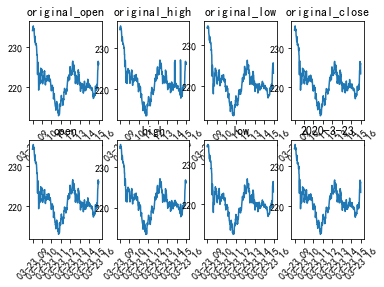

In [10]:
outliner_remover.test_outliner_remover({'year': 2020,
                           'month': 3,
                           'day': 23})

##  Import neccessary module from `process_data.py` 

In [95]:
from process_data import get_one_column_data

# Processing Data

Time to process the data from seperate files  `Open`,`Low`,`High`,`Close`

In [96]:
data_dir='test_data'  # the directory of input files

In [97]:
open_data = get_one_column_data(f'{data_dir}/test_open.xlsx', 'open')
low_data = get_one_column_data(f'{data_dir}/test_low.xlsx', 'low')
high_data = get_one_column_data(f'{data_dir}/test_high.xlsx', 'high')
close_data = get_one_column_data(f'{data_dir}/test_close.xlsx', 'close')

finished read test_open.xlsx
finished read test_low.xlsx
finished read test_high.xlsx
finished read test_close.xlsx


Merge the processed data into `data`

In [98]:
data = pd.merge(open_data, high_data, on=['code', 'date'])
data = pd.merge(data, low_data, on=['code', 'date'])
data = pd.merge(data, close_data, on=['code', 'date'])
data = data[['code', 'date', 'open', 'high', 'low', 'close']]

Save the `data` into `result_dir`

In [99]:
result_dir='processed_data/data.csv'
os.makedirs(os.path.dirname(result_dir), exist_ok=True)

In [100]:
data.to_csv(f'{result_dir}', index=False)

In [102]:
data.head(10)

,code,date,open,high,low,close
0,0820143D,1995-01-01,NaN,NaN,NaN,NaN
1,0820143D,1995-01-02,NaN,NaN,NaN,NaN
2,0820143D,1995-01-03,25.19,25.42,24.64,25.08
3,0820143D,1995-01-04,25.08,25.08,24.86,24.86
4,0820143D,1995-01-05,24.97,25.53,24.97,25.31
5,0820143D,1995-01-06,25.42,26.30,25.31,26.08
6,0820143D,1995-01-07,NaN,NaN,NaN,NaN
7,0820143D,1995-01-08,NaN,NaN,NaN,NaN
8,0820143D,1995-01-09,25.97,26.19,25.31,25.42
9,0820143D,1995-01-10,26.64,26.64,26.08,26.19


In [103]:
'Processed code data:',sorted(set(data['code'].to_list()))

('Processed code data:', ['0820143D', '1005050Q', '1051665D', 'XLNX'])

In [104]:
date_range=set(data['date'].to_list())
'Date range:',min(date_range),max(date_range)

('Date range:',
 Timestamp('1995-01-01 00:00:00'),
 Timestamp('2020-05-10 00:00:00'))

In [105]:
'Data columns', data.columns

('Data columns',
 Index(['code', 'date', 'open', 'high', 'low', 'close'], dtype='object'))

# Get Indicator from Package `main.py`

In [106]:
!python ../main.py -h

usage: main.py [-h] -d DATA_DIR [-s SAVE_PATH]
               [-i {all,trend,momentum,my,volatility,volume,other}]
               [-lc LIMIT_CODE] [-cp COLUMN_PREFIX] [-cif CUSTOM_INDICATOR_FN]
               [-cia CUSTOM_INDICATOR_ARGS] [-ci CUSTOM_INDICATOR]

Trade Indicators

optional arguments:
  -h, --help            show this help message and exit
  -d DATA_DIR, --data_dir DATA_DIR
                        the direction for reading processed data.csv
  -s SAVE_PATH, --save_path SAVE_PATH
                        The result file path for saving
  -i {all,trend,momentum,my,volatility,volume,other}, --indicator {all,trend,momentum,my,volatility,volume,other}
                        Which indicator(s) would you want to add? Please
                        select in
                        [all,trend,momentum,my,volatility,volume,other]. Note
                        that the columns [Open,High,Low,Close] must be
                        contained in data
  -lc LIMIT_CODE, --limit_code LIM

# Test
Get the data from directory `process_data/` and save the code `XLNX`'s result on `momentum.rsi(close,n=14)` to `result/test_result.xlsx` 

Note that the result on `{all,trend,momentum,my,volatility,volume,other}` indicators can be caculated only when data must contain `OHLCV`

In [109]:
!python ../main.py --data_dir processed_data \
--save_path result/test_result.xlsx \
--custom_indicator_fn momentum.rsi \
--custom_indicator_args close,n=14 \
--limit_code XLNX

solving csv file data.csv . . .
rsi(close,n=14)
saving data into result/test_result.xlsx successfully



100%|██████████| 1/1 [00:01<00:00,  1.51s/it]


In [110]:
pd.read_excel('result/test_result.xlsx').tail(10)

,code,date,open,high,low,close,rsi
6373,XLNX,2020-04-27,90.30,91.38,88.45,88.81,57.55
6374,XLNX,2020-04-28,89.99,90.46,85.84,85.89,48.21
6375,XLNX,2020-04-29,87.79,92.00,87.00,91.70,62.26
6376,XLNX,2020-04-30,91.22,91.33,87.03,87.40,50.55
6377,XLNX,2020-05-01,86.25,86.38,82.87,82.99,41.35
6378,XLNX,2020-05-04,83.31,83.33,81.66,83.24,42.04
6379,XLNX,2020-05-05,83.98,85.51,82.97,83.50,42.85
6380,XLNX,2020-05-06,84.32,87.38,84.32,85.24,48.40
6381,XLNX,2020-05-07,86.36,87.20,84.27,84.43,46.00
6382,XLNX,2020-05-08,85.30,86.93,85.21,86.86,53.91
